# Exploratory Data Analysis on Employee Attrition
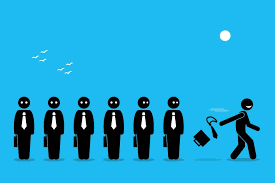

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#import">Importing Libraries</a></li>
<li><a href="#extract">Data Extraction</a></li>
<li><a href="#basic">Basic Exploration</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#resources">Resources</a></li>
</ul>

<a id='intro'></a>
## Introduction

__Employee attrition__ is defined as the natural process by which employees leave the workforce – for example, through resignation for personal reasons or retirement – and are not immediately replaced.

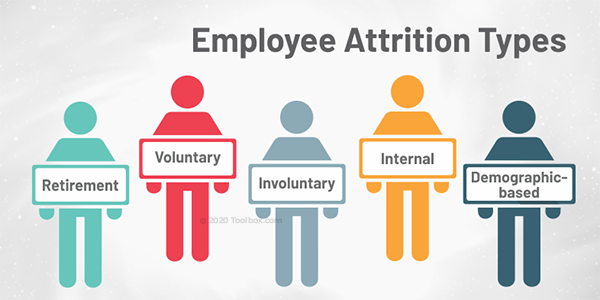

Some forms of attrition are inevitable, such as when an employee retires or relocates. Attrition, however, can seriously hurt both the financial health and corporate culture of your organization after a certain point.

Any firm must prepare for attrition. A day will come when a worker wishes to quit your business, whether for personal or professional reasons.

__Dataset Attributes__

- Age : Numerical Discrete Data
- Attrition : Text Categorical Data
- BusinessTravel : Text Categorical Data
- DailyRate : Numerical Discrete Data
- Department : Text Categorical Data
- DistanceFromHome : Numerical Discrete Data measured in kilometers
- Education : Numerical Categorical Data
1. Below College
2. College
3. Bachelor
4. Master
5. Doctor
- EducationField : Text Categorical Data
- EmployeeCount : Numerical Categorical Data
- EmployeeNumber : Numerical Categorical Data
- EnvironmentSatisfaction : Numerical Categorical Data
1. Low
2. Medium
3. High
4. Very High
- Gender : Text Categorical Data
- HourlyRate : Numerical Discrete Data
- JobInvolvement : Numerical Categorical Data
1. Low
2. Medium
3. High
4. Very High
- JobLevel : Numerical Categorical Data
- JobRole : Text Categorical Data
- JobSatisfaction : Numerical Categorical Data
1. Low
2. Medium
3. High
4. Very High
- MaritalStatus : Text Categorical Data
- MonthlyIncome : Numerical Discrete Data
- MonthlyRate : Numerical Discrete Data
- NumCompaniesWorked : Numerical Discrete Data
- Over18 : Text Categorical Data
- OverTime : Text Categorical Data
- PercentSalaryHike : Numerical Discrete Data
- PerformanceRating : Numerical Categorical Data
1. Low
2. Good
3. Excellent
4. Outstanding
- RelationshipSatisfaction : Numerical Categorical Data
1. Low
2. Good
3. Excellent
4. Outstanding
- StandardHours : Numerical Discrete Data
- StockOptionLevel : Numerical Categorical Data
- TotalWorkingYears : Numerical Discrete Data
- TrainingTimesLastYear : Numerical Discrete Data
- WorkLifeBalance : Numerical Categorical Data
1. Bad
2. Good
3. Better
4. Best
- YearsAtCompany : Numerical Discete Data
- YearsInCurrentRole : Numerical Discrete Data
- YearsSinceLastPromotion : Numerical Discrete Data
- YearsCurrManager : Numerical Discrete Data

__In this project__, I extracted, cleaned, explored and visualized the dataset from IBM employee attribution. I used the dataset  to answer the following questions;

- What are the factors behind employee attrition?
- What is the relationship between Education and Monthly Income?
- What is the effect of age on attrition?
- Is Income the main factor in employee attrition?
- How does work-life balance impact the overall attrition rate?

<a id='import'></a>
## Importing Libraries

In [2]:
# Import 3rd party libraries
import numpy as np
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# pandas settings
pd.options.display.max_rows = 1_000
pd.options.display.max_columns = 1_000
pd.options.display.max_colwidth = 1_000

# Import builtin modules
import typing as tp

# Black code formatter
%load_ext lab_black

<a id='extract'></a>
## Data Extraction

In [3]:
# connect to a database
con = sqlite3.connect("attr_data.db")
# check if the database has been connected successfully
print("Connected successfully")

# create cusor object that allows the execution of sql statements
cur = con.cursor()
# check if the cusor is created
print("Cusor created")

Connected successfully
Cusor created


In [4]:
# checking for table names
cur.execute('SELECT name FROM sqlite_master WHERE type="table";')
print(cur.fetchall())

[('attrition_records',), ('sqlite_sequence',)]


In [5]:
# using pandas to place the result of the query in a dataframe
df = pd.read_sql_query("SELECT * FROM 'attrition_records';", con)
df.head()

,id,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,2,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,3,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,4,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,5,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


<a id='basic'></a>
## Basic Exploration

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   id                        1470 non-null   int64 
 1   Age                       1470 non-null   int64 
 2   Attrition                 1470 non-null   object
 3   BusinessTravel            1470 non-null   object
 4   DailyRate                 1470 non-null   int64 
 5   Department                1470 non-null   object
 6   DistanceFromHome          1470 non-null   int64 
 7   Education                 1470 non-null   int64 
 8   EducationField            1470 non-null   object
 9   EmployeeCount             1470 non-null   int64 
 10  EmployeeNumber            1470 non-null   int64 
 11  EnvironmentSatisfaction   1470 non-null   int64 
 12  Gender                    1470 non-null   object
 13  HourlyRate                1470 non-null   int64 
 14  JobInvolvement          

In [7]:
# checking for duplicates
df.duplicated().sum()

0

In [8]:
# checking for null values
df.isna().sum()

id                          0
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCur

In [9]:
df.describe()

,id,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,735.500000,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,424.496761,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,1.000000,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,368.250000,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,735.500000,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1102.750000,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,1470.000000,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [10]:
df.sample(10)

,id,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
453,454,26,Yes,Travel_Frequently,426,Human Resources,17,4,Life Sciences,1,608,2,Female,58,3,1,Human Resources,3,Divorced,2741,22808,0,Y,Yes,11,3,2,80,1,8,2,2,7,7,1,0
769,770,26,No,Travel_Frequently,921,Research & Development,1,1,Medical,1,1068,1,Female,66,2,1,Research Scientist,3,Divorced,2007,25265,1,Y,No,13,3,3,80,2,5,5,3,5,3,1,3
895,896,31,No,Travel_Rarely,1332,Research & Development,11,2,Medical,1,1251,3,Male,80,3,2,Healthcare Representative,1,Married,6833,17089,1,Y,Yes,12,3,4,80,0,6,2,2,6,5,0,1
805,806,45,No,Non-Travel,1050,Sales,9,4,Life Sciences,1,1117,2,Female,65,2,2,Sales Executive,3,Married,5593,17970,1,Y,No,13,3,4,80,1,15,2,3,15,10,4,12
963,964,38,No,Travel_Rarely,1009,Sales,2,2,Life Sciences,1,1355,2,Female,31,3,2,Sales Executive,1,Divorced,6893,19461,3,Y,No,15,3,4,80,1,11,3,3,7,7,1,7
1241,1242,32,No,Travel_Rarely,371,Sales,19,3,Life Sciences,1,1739,4,Male,80,1,3,Sales Executive,3,Married,9610,3840,3,Y,No,13,3,3,80,1,10,2,1,4,3,0,2
978,979,40,No,Travel_Rarely,1202,Research & Development,2,1,Medical,1,1375,2,Female,89,4,2,Healthcare Representative,3,Divorced,6377,13888,5,Y,No,20,4,2,80,3,15,0,3,12,11,11,8
1269,1270,43,No,Travel_Rarely,244,Human Resources,2,3,Life Sciences,1,1778,2,Male,97,3,1,Human Resources,4,Single,3539,5033,0,Y,No,13,3,2,80,0,10,5,3,9,7,1,8
934,935,25,No,Travel_Rarely,266,Research & Development,1,3,Medical,1,1303,4,Female,40,3,1,Research Scientist,2,Single,2096,18830,1,Y,No,18,3,4,80,0,2,3,2,2,2,2,1
890,891,54,No,Travel_Frequently,966,Research & Development,1,4,Life Sciences,1,1245,4,Female,53,3,3,Manufacturing Director,3,Divorced,10502,9659,7,Y,No,17,3,1,80,1,33,2,1,5,4,1,4


In [11]:
df_attr = df.query('Attrition == "Yes"')
df_Noattr = df.query('Attrition == "No"')

<a id='eda'></a>
## Exploratory Data Analysis

<AxesSubplot:>

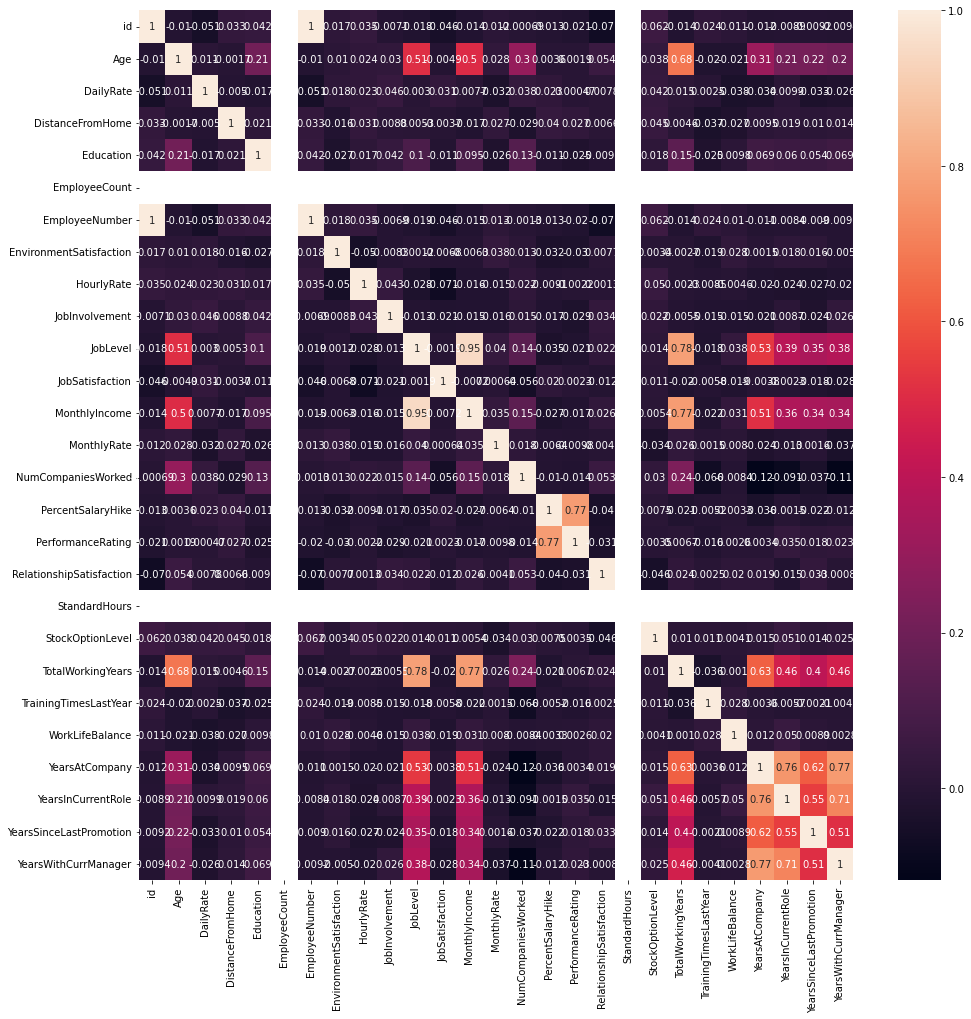

In [12]:
# checking for correlation between columns
corelation = df.corr()
plt.figure(figsize=(16, 16))
sns.heatmap(corelation, annot=True)

#### Factors behind employee attrition

In [13]:
# creating a function to draw histograms


def hist_plt(df1, column, bins=20):
    """A function to draw a histogram"""
    # setting desired the chart size
    plt.figure(figsize=(10, 8))
    sns.histplot(
        data=df1, x=column, bins=bins, kde=False, hue="Attrition", multiple="dodge"
    )
    # setting the title
    plt.title(column)
    plt.show()
    return plt

##### Is the total working years of an employee a factor?

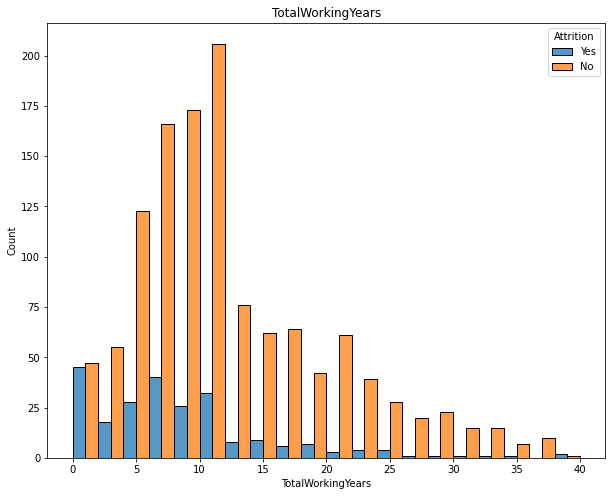

<module 'matplotlib.pyplot' from 'C:\\Users\\Engr. Pat\\Downloads\\Compressed\\ancon\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [14]:
hist_plt(df, "TotalWorkingYears")

From the chart, it can be seen that most employees that left the company spent less than 15 years working.

##### Is the distance from home of an employee a factor?

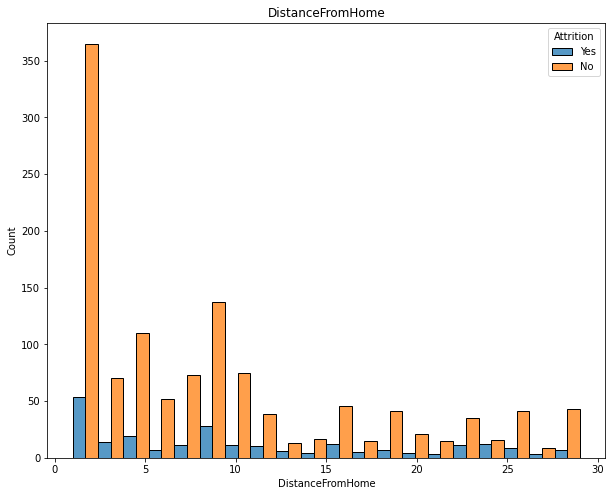

<module 'matplotlib.pyplot' from 'C:\\Users\\Engr. Pat\\Downloads\\Compressed\\ancon\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [22]:
hist_plt(df, "DistanceFromHome")

it can be seen from the chart that most employees that left the company live more than 10km from the company 

##### Is the marital status of an employee a factor?

In [24]:
# getting the attrited employees rows and columns
df_attr = df.query("Attrition == 'Yes'")
# getting the non-attrited employees rows and columns
df_Noattr = df.query("Attrition == 'No'")

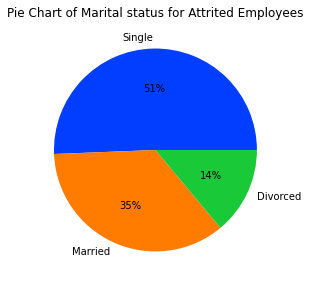

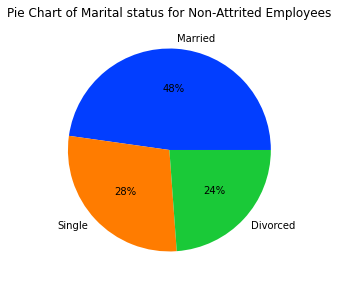

In [42]:
# defining seaborn color palette to use
col = sns.color_palette("bright")

# increasing the chart size
plt.figure(figsize=(10, 10))
# making two plots
plt.subplot(1, 2, 1)
# plotting a pie chart
data = df_attr.MaritalStatus.value_counts()
# labelling the portions
keys = ["Single", "Married", "Divorced"]
plt.pie(data, labels=keys, colors=col, autopct="%.f%%")
plt.title("Pie Chart of Marital status for Attrited Employees")
plt.show()

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 2)
data2 = df_Noattr.MaritalStatus.value_counts()
keys2 = ["Married", "Single", "Divorced"]
plt.pie(data2, labels=keys2, colors=col, autopct="%.f%%")
plt.title("Pie Chart of Marital status for Non-Attrited Employees")
plt.show()

It can be seen from the pie chart above that most of the employees that attrited are single.

#### What is the relationship between Education and Monthly Income?

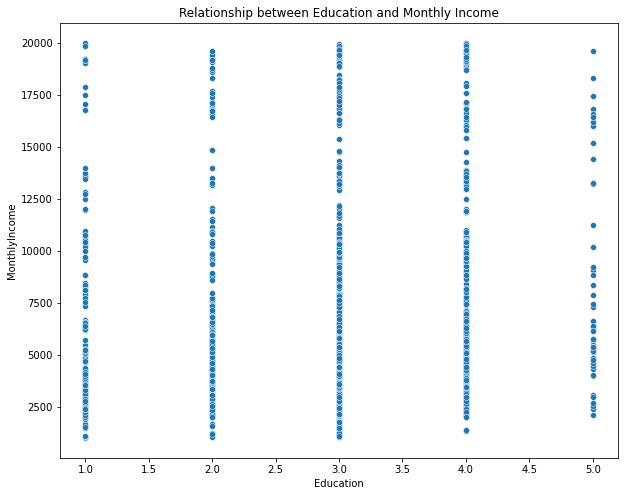

In [17]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x="Education", y="MonthlyIncome", data=df)
plt.title("Relationship between Education and Monthly Income")
plt.show()

From the chart it can be seen that there is no correlation/relationship between the level of education of an employee and their monthly income

#### What is the effect of age on attrition?

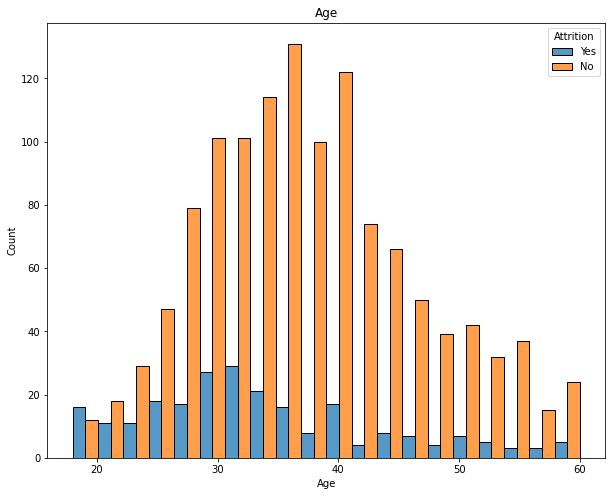

<module 'matplotlib.pyplot' from 'C:\\Users\\Engr. Pat\\Downloads\\Compressed\\ancon\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [18]:
hist_plt(df, "Age")

From the chart it can be seen that most employee between age 28-32 left the company

#### Is income the main factor in employee attrition?

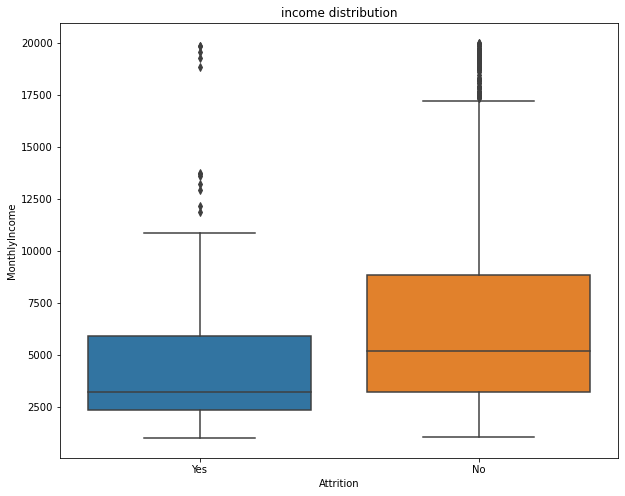

In [19]:
plt.figure(figsize=(10, 8))
sns.boxplot(x="Attrition", y="MonthlyIncome", data=df)
plt.title("income distribution")
plt.show()

From the chart it can be seen that the attrited employees have a lower overall monthly income. The attrited employees have a median of about $2000 less than that of the employees still in the company 

#### How doess work-life balance impact the overall attrition rate 

In [20]:
# using crosstab to calculate attrition rate
rate = pd.crosstab(df["WorkLifeBalance"], df["Attrition"])
total = rate.Yes.sum()
percentage = pd.DataFrame((rate["Yes"] / total) * 100)
percentage = percentage.reset_index()

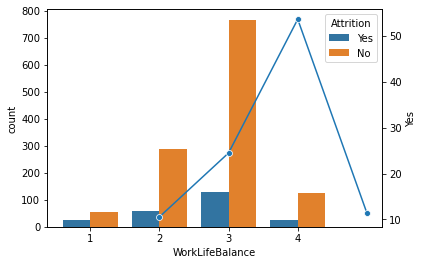

In [43]:
# plotting and barchart and a linechart on the same plot
ax1 = plt.subplot(1, 1, 1)
sns.countplot(x="WorkLifeBalance", data=df, hue="Attrition")
ax2 = ax1.twinx()
sns.lineplot(data=percentage, x="WorkLifeBalance", y="Yes", marker="o")

plt.show()

In [46]:
# close connection to database
con.close()

<a id='conclusions'></a>
## Conclusions

1. Total wowking years, distance from home and marital stauts are factors behind employee attrition
2. Level of education doesnt determine monthly income
3. Young employees tend to attrite more than older employees
4. Most attrited employees have less monthly income compared to non-attrited employees

<a id='resources'></a>
## Resources

1. https://youtu.be/dLkj1wKj6KU
2. https://youtu.be/PTy7hw7goeA
3. https://youtu.be/-2Ka76nCegg
4. https://www.geeksforgeeks.org/how-to-create-a-pie-chart-in-seaborn/amp/
5. https://datagy.io/seaborn-line-plot/
6. https://stackoverflow.com/questions/37930693/how-can-i-make-a-barplot-and-a-lineplot-in-the-same-seaborn-plot-with-different
7. https://stackoverflow.com/questions/305378/list-of-tables-db-schema-dump-etc-using-the-python-sqlite3-api